**Estudo de caso**

A análise a seguir se refere ao Boston Housing Dataset, um dataset público que contém informações coletadas pelo US Census sobre preços das casas na área de Boston. Foi utilizado o método de machine learning - multiple linear regression feito na linguagem de programação python para a análise do dataset.

O objetivo principal do estudo é desenvolver um modelo preditivo de regressão linear para tentar prever o preço de uma casa em Boston e verificar qual(is) features são as mais relevantes para o modelo e que o modelo apresente uma taxa de assertividade superior a 70%.

**Importando as bibliotecas para análise.**

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as srn

import warnings
warnings.filterwarnings('ignore')

**Carregando o dataset.**

In [ ]:
boston = load_boston()

**Visualizando o tamanho do dataset.**

In [ ]:
boston.data.shape

(506, 13)

**Descrição do dataset com suas variáveis preditoras e a classe.**

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Resumo dos métodos do dataset.**

In [ ]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


**Visualizando o nome das colunas do dataset.**

In [ ]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


**Conversão do dataset em um dataframe do pandas e visualizando as primeiras linhas do dataframe.**

In [ ]:
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**Inserindo o nome das colunas no dataframe e conferindo o resultado.**

In [ ]:
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**Incluindo a coluna 'PRICE' no dataframe.**

In [ ]:
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.shape

(506, 14)

**Visualizando a coluna "PRICE" por um gráfico de dispersão.**

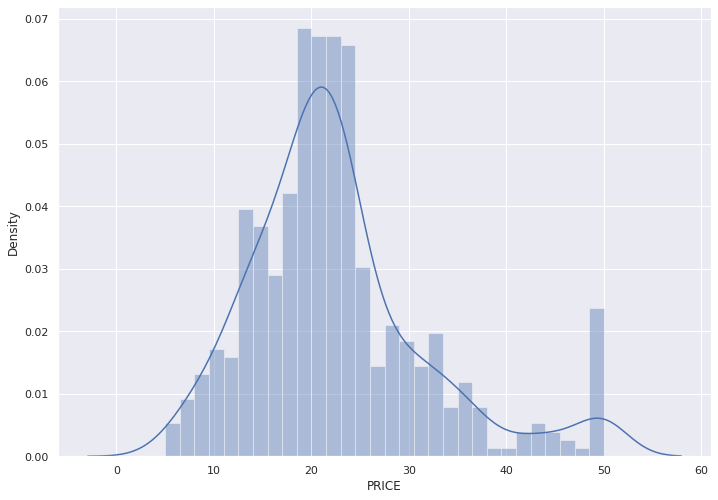

In [ ]:
srn.set(rc={'figure.figsize':(11.7,8.27)})
srn.distplot(df['PRICE'], bins=30)
plt.show()

**Visualizando os tipos de dados do dataframe.**

In [ ]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

**Verificando os valores únicos do dataframe.**

In [ ]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

**Verificando se há valores nulos no dataframe.**

In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

**Verificando se há colunas sem títulos no dataframe.**

In [ ]:
df[df.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


**Visualizando o resumo estatístico do dataframe.**

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Verificando a correlação entre as variáveis do dataframe.**

In [ ]:
correlacao = df.corr()
correlacao

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


**Verificando a correlação entre as variáveis do dataframe por um gráfico.**

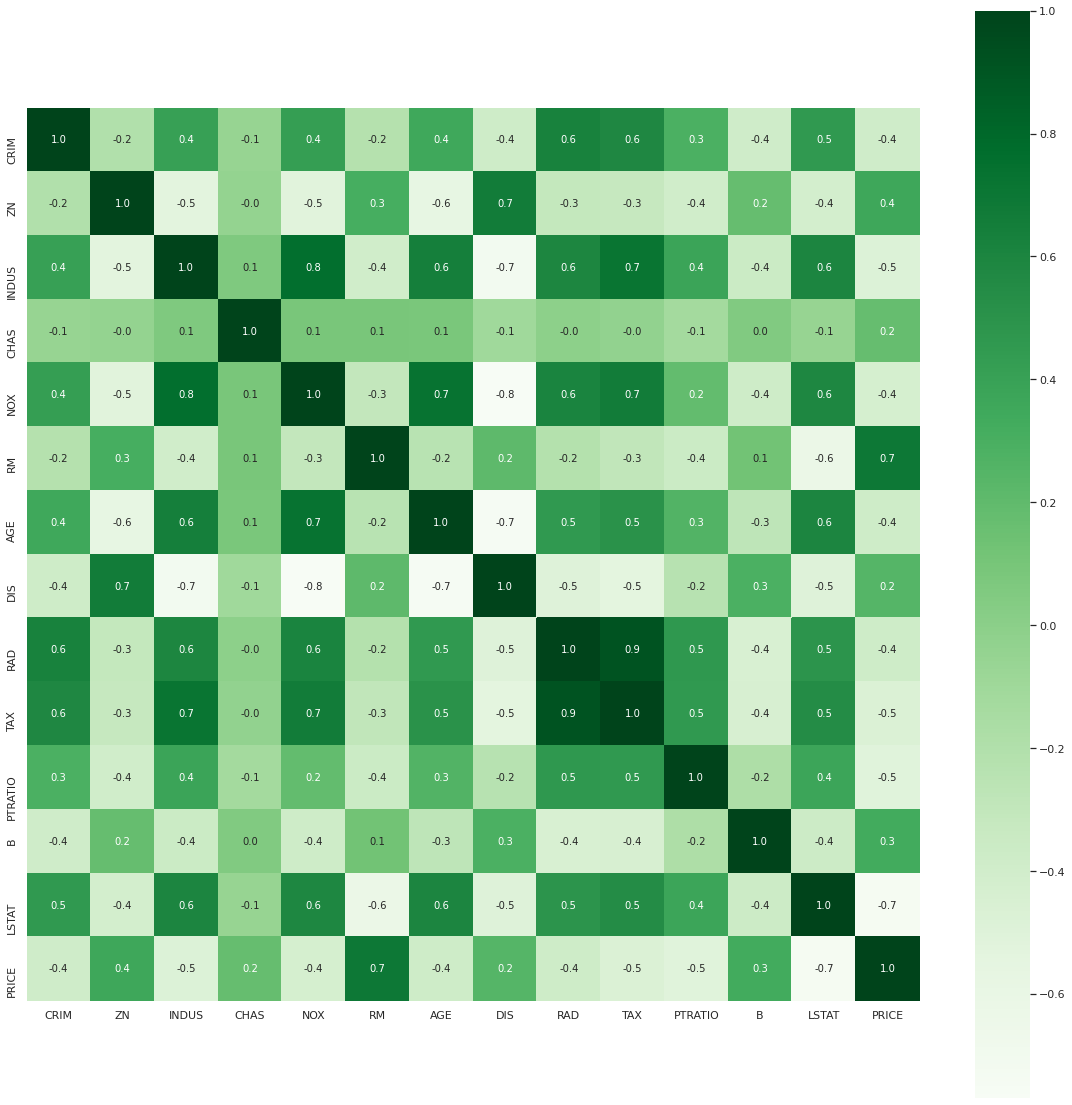

In [ ]:
plt.figure(figsize=(20,20))
srn.heatmap(correlacao, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')

**Dropando a coluna 'PRICE' do dataframe para treinamento do modelo preditivo.**

In [ ]:
x = df.drop(['PRICE'], axis=1)
x 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
y = df['PRICE']
y 

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

**Dividindo as variáveis em treino e teste para construção do modelo preditivo.**

In [ ]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size=0.3)

**Criação e definição do modelo preditivo e treinamento.**

In [ ]:
lm = LinearRegression()
lm.fit(x_treinamento, y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Previsão.**

In [ ]:
previsao = lm.predict(x_treinamento)
previsao

array([21.86025143, 25.72598874, 15.2040895 , 19.2442869 , 22.36572586,
       24.49090222, 11.94936984, 13.10340648, 26.43986896, 26.45150307,
       20.18239783, 25.11449463, 14.49398329, 35.77686504, 23.62182821,
       28.2521473 , 19.01790327, 14.38954701, 23.83929952, 13.50255224,
       22.97502407, 25.5756378 , 32.66966372, 29.90076605, 21.12624979,
       20.83740595, 24.39340527, 18.03718067, 12.41926674, 34.66650691,
       19.4401783 , 21.46629025, 23.01026227, 14.93311655, 15.35877583,
       23.69710139, 18.50346819, 26.45955952, 32.23944978,  7.71402706,
       16.33265684, 18.74072146, 23.84111192, 21.74159349, 21.02184745,
       28.31097993, 26.48676623, 26.62067474, 19.454281  , 25.50862127,
       32.87400917, 18.77327246, 17.5748288 , 20.23060072, 18.38301646,
        6.15511552, 19.10260039, 21.33293676, 23.95371773, 43.51405919,
       13.24482998, 20.25475181, 12.46972151, 23.14105214, 34.69714299,
       21.30805828, 21.44883755, 14.83511376, 18.19137901, 24.80

**Apurando as métricas de treino e teste do modelo preditivo.**

In [ ]:
rmse = (np.sqrt(mean_squared_error(y_treinamento, previsao)))
r2 = r2_score(y_treinamento, previsao)

print("Performance do modelo em treino")
print("--------------------------------------")
print(f'RMSE: {rmse:.2f}')
print(f'R2 score: {r2:.2f}')
print("\n")

# model evaluation for testing set
previsao_teste = lm.predict(x_teste)
rmse = (np.sqrt(mean_squared_error(y_teste, previsao_teste)))
r2 = r2_score(y_teste, previsao_teste)

print("Performance do modelo em teste")
print("--------------------------------------")
print(f'RMSE: {rmse:.2f}')
print(f'R2 score: {r2:.2f}')

Performance do modelo em treino
--------------------------------------
RMSE: 4.33
R2 score: 0.76


Performance do modelo em teste
--------------------------------------
RMSE: 5.63
R2 score: 0.69


**Visualização final por um gráfico de dispersão.**

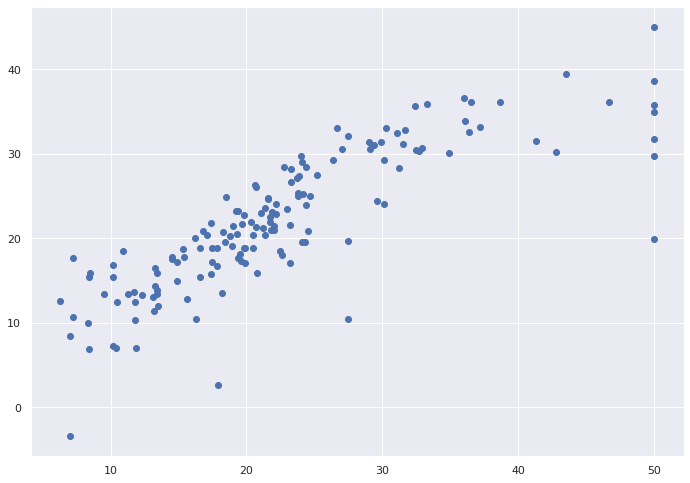

In [ ]:
plt.scatter(y_teste, previsao_teste)
plt.show()

**Conclusão:**

Após aplicar os devidos tratamentos, transformações e limpiza no datatset foi possível aplicar o algorítmo de Regressão Linear em Machine Learning para prever o preço de uma casa na região de Boston, com acurácia inicial de 73%.